<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/PI_BUFFON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-X-P-E-R-I-M-E-N-T-O _ D-E _ L-A _ A-G-U-J-A _ D-E _ B-U-F-F-O-N

Imagina una superficie plana dividida en franjas paralelas por líneas equidistantes entre sí. La distancia entre líneas es igual a la longitud de una aguja que se lanza al azar sobre esta superficie.

Las características del experimento son las siguientes:

* La aguja tiene una longitud conocida $L$.

* Las líneas paralelas están separadas por una distancia $d$, donde $d \leq L$.

* La aguja se lanza al azar sobre la superficie y se registra si cruza alguna línea o no.

El objetivo del experimento es determinar la probabilidad $P$ de que la aguja cruce una de las líneas entre las franjas paralelas.

La fórmula que relaciona la probabilidad $P$ es

$$ P=\frac{2L}{\pi d} $$

Para estimar el valor de $\pi$ , podemos definir un modelo de bernoulli, donde:

 $$ Éxito (X_i = 1): \text{ la aguja cruza una línea en el lanzamiento } i $$
 $$ Fracaso (X_i = 0): \text{ la aguja no cruza una línea en el lanzamiento }i $$

* Sabemos que la media $\mu$ de la distribución de Bernoulli de $X_i$ es P.

$$ E[X_i] = \mu = 1(P) + 0(1-P) = P$$

* Y la varianza

$$ V[X_i] = \sigma^2 = P - P^2 = P(1-P)$$

Ademas sabemos que:
$$ P = \frac{2L}{\pi d} ⟹ \pi = \frac{2L}{Pd}$$

Para aplicar el Teorema de Chebyshev y determinar el tamaño de la muestra necesaria para estimar π con una precisión deseada en el Experimento de la aguja de Buffon, definiremos:

* La presición deseada de $\epsilon$, con una probabilidad de fallo de $1-\delta$

* Tenemos que la media , es igual a
$$ \mu = P = \frac{2L}{\pi d}$$

y la varianza es
$$ \sigma^2 = P(1-P) $$

* El estimados de $\pi$ es
$$\hat{\pi} = \frac{2LN}{dN_c}$$
donde $N_c$ es igual al número de éxitos ( la aguja cruza la linea)

* Aplicamos el teorema de chebychev
Nosotros queremos que:
$$ P(|\hat{\pi}-\pi| \geq \epsilon) \leq \delta$$

$$ ⟹ P(|\hat{P}-P| \geq k\sigma) \leq \frac{1}{k^2}$$
donde $k=\frac{\epsilon}{\sigma}$

* Asi relacionamos a $\epsilon$ con $N$, sabemos que $\hat{P} = \frac{N_c}{N}$, la varianza de $\hat{P}$ es $\frac{\sigma^2}{N}$ asi vimos que para la varianza de $\hat{\pi}$ es igual a:

$$ \sigma^2 = P(1-P) $$

lo que implica que

$$\frac{\epsilon}{\sqrt{\frac{P(1-P)}{N}}} \geq \sqrt{\frac{1}{\delta}}$$

resolviendo para $N$

$$ ⟹ \epsilon \geq \sqrt{\frac{P(1-P)}{N\delta}} $$

$$ ⟹ N \geq \frac{P(1-P)}{\epsilon^2 \delta}$$

Asi obtendremos el valor de $N$ aproximadamente.

EJEMPLO DE APLICACION

Supongamos que

$$⟶ L=1$$ $$⟶ d=1$$ $$⟶ \epsilon = 0.01 \text{ (presición deseada)}$$ $$ ⟶\delta = 0.05 \text{ (probabilidad de fallo)}$$

* Primero calculamos $\mu = P$

$$ P=\frac{2L}{\pi d} = \frac{2}{\pi}$$

* Despues la varianza $= P(1-P)$

$$ P(1-P)=\frac{1}{\pi} - \frac{\pi-1}{\pi} = \frac{2\pi-4}{\pi^2}$$

* Finalmente, aplicamos la formula para $N$ es

$$ N \geq \frac{\frac{2\pi-4}{\pi^2}}{\epsilon^2 \delta}  = \frac{2\pi -4}{\pi^2 \epsilon^2 \delta }$$

$$ N \geq \frac{2\pi -4}{\pi^2 (0.01)^2 (0.05) }$$

$$ ⟹ N \geq 46267.0075$$

Asi necesariamente necesitariamo al menos 46,267 lanzamientos para la estimación de $\pi$ .


* Ahora simulemos nuestra estimación para $\pi$ usando los valores de el ejemplo anterior

In [403]:
# Agregamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


In [404]:
# Realizamos el experimento
def pi_buffon(L, D, N):
    cont = 0  # Contador de cruces
    pi = []   # Lista para almacenar las estimaciones de π
    crosses = []  # Lista para almacenar los resultados de las cruces

    for _ in range(N):
        theta = np.random.uniform(0, np.pi)  # Ángulo aleatorio entre 0 y π
        x = np.random.uniform(0, D / 2)  # Distancia aleatoria entre 0 y D/2

        # Comprobar si la aguja cruza una línea
        if x <= (L / 2) * np.sin(theta):
            cont += 1  # Incrementar el contador de cruces
            crosses.append(True)  # Registrar que la aguja cruzó
        else:
            crosses.append(False)  # Registrar que la aguja no cruzó

        # Estimación de π actualizada para cada iteración
        pi_est = (2 * L * (_ + 1)) / (D * cont)
        pi.append(pi_est)

    return pi



In [405]:
# Ejecutar la función y obtener la lista de estimaciones de π
estimacion = pi_buffon(1.0, 1.0, 46267)


In [406]:
# Última estimación de π
final_pi_est = estimacion[-1]
print(f"Estimación final de π: {final_pi_est:.6f}")

Estimación final de π: 3.143993


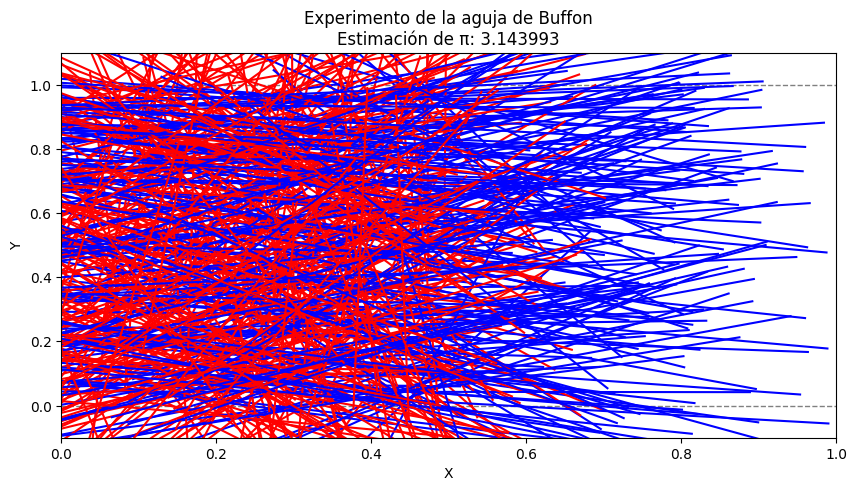

In [408]:
# Gráficamos del experimento
fig, ax = plt.subplots(figsize=(10, 5))

# Dibujamos las líneas paralelas (ajustado según tus datos de L y D)
for i in range(int(max(y_center) // D) + 2):
 ax.axhline(i * D, color='grey', linestyle='--', linewidth=1)

# Mostramos solo las primeras 500 estimaciones para la gráfica
for i in range(500): # Mostramos las primeras 500 agujas para no saturar la gráfica
 color = 'red' if crosses[i] else 'blue'
 ax.plot([x_end1[i], x_end2[i]], [y_end1[i], y_end2[i]], color=color)

# Configuración de la gráfica
ax.set_xlim(0, D)
ax.set_ylim(-0.1, 1.1)
ax.set_title(f'Experimento de la aguja de Buffon\nEstimación de π: {final_pi_est:.6f}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [409]:
mu=np.mean(estimacion)  #Calculamos la media de estimacion
print(mu)

3.1343778974847814


In [410]:
sigma2=np.var(estimacion) #Calculamos la varianza de estimacion
print(sigma2)

0.0006470628926017399


(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00,
        7.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 2.1000e+01,
        3.2000e+01, 2.5000e+01, 2.2000e+01, 2.3000e+01, 5.1000e+02,
        4.2737e+04, 2.1070e+03, 5.4000e+02, 1.6300e+02, 5.2000e+01]),
 array([2.        , 2.04395373, 2.08790747, 2.1318612 , 2.17581493,
        2.21976866, 2.2637224 , 2.30767613, 2.35162986, 2.3955836 ,
        2.43953733, 2.48349106, 2.52744479, 2.57139853, 2.61535226,
        2.65930599, 2.70325973, 2.74721346, 2.79116719, 2.83512093,
        2.87907466, 2.92302839, 2.96698212, 3.01093586, 3.05488959,
        3.09884332, 3.14279706, 3.18675079, 3.23070452, 3.27465825,
        3.31861199]),
 <BarContainer object of 30 artists>)

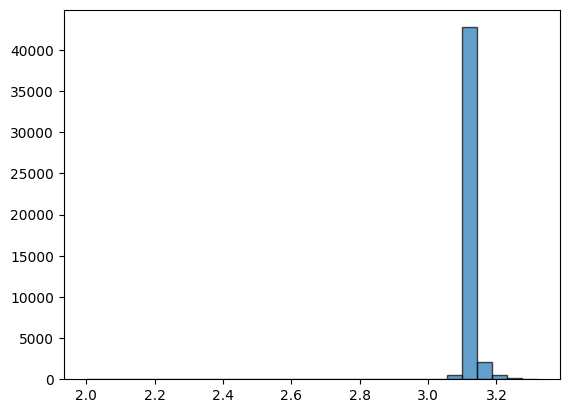

In [427]:
# Graficar un histograma de las estimaciones de π
plt.hist(estimacion, bins=30, edgecolor='black', alpha=0.7)


Nuestras probabilidades posibremente siguen una distribucion normal

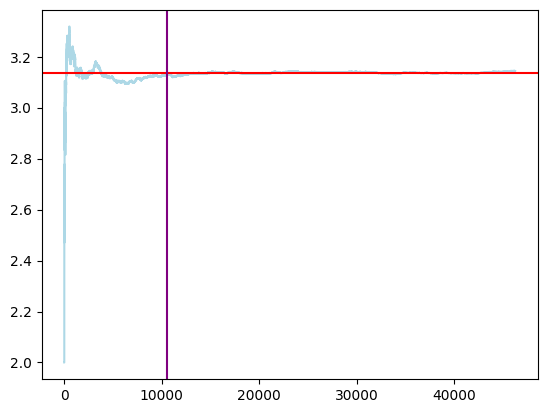

In [415]:
plt.plot(estimacion,color='lightblue')  #Graficamos los valores de G obtenidos
plt.axhline(mu,color="red")
plt.axvline(10500,color="purple")

podriamos decir que apartir de 10,000 lanzamientos podriamos encontrar un valor de $\pi$ sin tanto error.